In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel('gcse-results-excel.xlsx', sheet_name = '2018-19', header = [1,2]) 

data.head()

Unnamed: 0_level_0    Unnamed: 1_level_0  \
                Code                  Area   
0                NaN                   NaN   
1          E09000001        City of London   
2          E09000002  Barking and Dagenham   
3          E09000003                Barnet   
4          E09000004                Bexley   

  Number of pupils at the end of key stage 4  \
                          Unnamed: 2_level_1   
0                                        NaN   
1                                          .   
2                                       2353   
3                                       3804   
4                                       3115   

  Average Attainment 8 score per pupil Average Progress 8 score per pupil  \
                    Unnamed: 3_level_1                 Unnamed: 4_level_1   
0                                  NaN                                NaN   
1                                    .                                  .   
2                                 46.4                               0.16   
3                                 57.1                               0.57   
4                                 49.6                              -0.09   

                      English and maths GCSEs  \
  Percentage of pupils entered for components   
0                                         NaN   
1                                           .   
2                                        97.3   
3                                        97.8   
4                                        97.8   

                                                       \
  Percentage of pupils who achieved a strong 9-5 pass   
0                                                NaN    
1                                                  .    
2                                               42.6    
3                                               62.7    
4                                               49.4    

                                                         \
  Percentage of pupils who achieved a standard 9-4 pass   
0                                                NaN      
1                                                  .      
2                                               61.9      
3                                               78.8      
4                                               68.4      

                                                           \
  Percentage of pupils who achieved a standard 9-4 pass.1   
0                                                NaN        
1                                                NaN        
2                                                NaN        
3                                                NaN        
4                                                NaN        

  Number of pupils at the end of key stage 4  ...  \
                          Unnamed: 9_level_1  ...   
0                                        NaN  ...   
1                                          .  ...   
2                                       1245  ...   
3                                       1986  ...   
4                                       1577  ...   

                        English and maths GCSEs  \
  Percentage of pupils entered for components.1   
0                                           NaN   
1                                             .   
2                                          96.6   
3                                          97.4   
4                                          97.2   

                                                         \
  Percentage of pupils who achieved a strong 9-5 pass.1   
0                                                NaN      
1                                                  .      
2                                               39.4      
3                                               60.3      
4                                               45.6      

                                                           \
  Percentag

In [16]:
# Data Exploration

# data.columns
# data.shape
# data.info()
# data.describe()

In [17]:
data.dropna(axis='columns', how='all', inplace=True) # drop blank columns

data.dropna(axis='index', how='all', inplace=True) # drop blank rows

# # filter rows based on London buroughs
data.drop(data.tail(12).index, inplace = True)
data.drop(data.head(1).index, inplace=True)
data.drop(data.iloc[:,9:12], inplace = True, axis = 1)
data.drop(data.iloc[:,12:15], inplace = True, axis = 1)

# resetting the index
data = data.reset_index()
del data['index']

# Renaming columns
data.columns=['Code ID', 'Area', 'Number of Pupils at the end of KS4', 'Average Attainment 8 score per pupil', 'Average Progress 8 score per pupil', 'Percentage of pupils entered for components', 'Percentage of pupils who achieved a strong pass (9-5)', 'Percentage of pupils who achieved a standard pass (9-4)', 'Number of boys at the end of KS4', 'Percentage of boys who achieved a strong pass (9-5)', 'Percentage of boys who achieved a standard pass (9-4)', 'Number of girls at the end of KS4', 'Percentage of girls who achieved a strong pass (9-5)', 'Percentage of girls who achieved a standard pass (9-4)']

data.head()

,Code ID,Area,Number of Pupils at the end of KS4,Average Attainment 8 score per pupil,Average Progress 8 score per pupil,Percentage of pupils entered for components,Percentage of pupils who achieved a strong pass (9-5),Percentage of pupils who achieved a standard pass (9-4),Number of boys at the end of KS4,Percentage of boys who achieved a strong pass (9-5),Percentage of boys who achieved a standard pass (9-4),Number of girls at the end of KS4,Percentage of girls who achieved a strong pass (9-5),Percentage of girls who achieved a standard pass (9-4)
0,E09000002,Barking and Dagenham,2353,46.4,0.16,97.3,42.6,61.9,1245,39.4,58.6,1108,46.2,65.7
1,E09000003,Barnet,3804,57.1,0.57,97.8,62.7,78.8,1986,60.3,76.8,1818,65.3,80.9
2,E09000004,Bexley,3115,49.6,-0.09,97.8,49.4,68.4,1577,45.6,64.4,1538,53.3,72.6
3,E09000005,Brent,3038,50.2,0.47,98,50.5,69.1,1525,47.3,66.1,1513,53.7,72.2
4,E09000006,Bromley,3312,50.8,0.03,96.8,51.1,72,1599,46.8,68.4,1713,55.2,75.4


In [18]:
# Combining the free school meal dataset
data_fsm = pd.read_excel('gcse-results-fsm.xlsx', sheet_name = '2018-19', header = [1,2]) 

data_fsm.head()

Unnamed: 0_level_0    Unnamed: 1_level_0  \
                Code                  Area   
0                NaN                   NaN   
1          E09000001        City of London   
2          E09000002  Barking and Dagenham   
3          E09000003                Barnet   
4          E09000004                Bexley   

                          Number of eligible pupils                   \
  Pupils known to be eligible for free school meals All other Pupils   
0                                               NaN              NaN   
1                                               0.0              0.0   
2                                             410.0           1943.0   
3                                             478.0           3326.0   
4                                             350.0           2765.0   

                                       Average Attainment 8 score per pupil  \
  All Pupils All Pupils.1 Pupils known to be eligible for free school meals   
0        NaN          NaN                                               NaN   
1        0.0          NaN                                                 .   
2     2353.0          NaN                                              39.5   
3     3804.0          NaN                                              44.2   
4     3115.0          NaN                                              38.2   

                                            ... Number of eligible pupils  \
  All other Pupils All Pupils All Pupils.1  ...        All other Pupils.2   
0              NaN        NaN          NaN  ...                       NaN   
1                .          .          NaN  ...                       0.0   
2             47.8       46.4          NaN  ...                     687.0   
3             58.9       57.1          NaN  ...                     802.0   
4               51       49.6          NaN  ...                     548.0   

                             \
  All Pupils.4 All Pupils.5   
0          NaN          NaN   
1          0.0          NaN   
2       1108.0          NaN   
3       1818.0          NaN   
4       1538.0          NaN   

                 Average Attainment 8 score per pupil                     \
  Pupils known to be eligible for free school meals.2 All other Pupils.2   
0                                                NaN                 NaN   
1                                                  .                   .   
2                                               42.3                54.9   
3                                               49.2                54.8   
4                                               41.4                60.1   

                             \
  All Pupils.4 All Pupils.5   
0          NaN          NaN   
1            .          NaN   
2         49.4          NaN   
3         59.4          NaN   
4         52.5          NaN   

                   Average Progress 8 score per pupil                     \
  Pupils known to be eligible for free school meals.2 All other Pupils.2   
0                                                NaN                 NaN   
1                                                  .                   .   
2                                               0.15                0.51   
3                                               0.46                0.72   
4                                              -0.25                0.74   

                
  All Pupils.4  
0          NaN  
1            .  
2          0.4  
3         0.82  
4         0.16  

[5 rows x 37 columns]

In [19]:
data_fsm.dropna(axis='columns', how='all', inplace=True) # drop blank columns

data_fsm.dropna(axis='index', how='all', inplace=True) # drop blank rows

data_fsm.drop(data_fsm.iloc[:,5:], inplace = True, axis = 1)# drop columns under Boys and Girls category

# # filter rows based on London buroughs
data_fsm.drop(data_fsm.tail(12).index, inplace = True)
data_fsm.drop(data_fsm.head(1).index, inplace=True)

#  resetting the index
data_fsm = data_fsm.reset_index()
del data_fsm['index']

# renaming columns
data_fsm.columns = ['Code ID', 'Area', 'Number of pupils known to be eligible for free school meals', 'Number of other pupils', 'Total pupils']


data_fsm.head()

,Code ID,Area,Number of pupils known to be eligible for free school meals,Number of other pupils,Total pupils
0,E09000002,Barking and Dagenham,410.0,1943.0,2353.0
1,E09000003,Barnet,478.0,3326.0,3804.0
2,E09000004,Bexley,350.0,2765.0,3115.0
3,E09000005,Brent,391.0,2647.0,3038.0
4,E09000006,Bromley,307.0,3005.0,3312.0


In [20]:
# merge the datasets on area, code id
df_pre_covid = pd.merge(data, data_fsm)
df_pre_covid.head()

,Code ID,Area,Number of Pupils at the end of KS4,Average Attainment 8 score per pupil,Average Progress 8 score per pupil,Percentage of pupils entered for components,Percentage of pupils who achieved a strong pass (9-5),Percentage of pupils who achieved a standard pass (9-4),Number of boys at the end of KS4,Percentage of boys who achieved a strong pass (9-5),Percentage of boys who achieved a standard pass (9-4),Number of girls at the end of KS4,Percentage of girls who achieved a strong pass (9-5),Percentage of girls who achieved a standard pass (9-4),Number of pupils known to be eligible for free school meals,Number of other pupils,Total pupils
0,E09000002,Barking and Dagenham,2353,46.4,0.16,97.3,42.6,61.9,1245,39.4,58.6,1108,46.2,65.7,410.0,1943.0,2353.0
1,E09000003,Barnet,3804,57.1,0.57,97.8,62.7,78.8,1986,60.3,76.8,1818,65.3,80.9,478.0,3326.0,3804.0
2,E09000004,Bexley,3115,49.6,-0.09,97.8,49.4,68.4,1577,45.6,64.4,1538,53.3,72.6,350.0,2765.0,3115.0
3,E09000005,Brent,3038,50.2,0.47,98,50.5,69.1,1525,47.3,66.1,1513,53.7,72.2,391.0,2647.0,3038.0
4,E09000006,Bromley,3312,50.8,0.03,96.8,51.1,72,1599,46.8,68.4,1713,55.2,75.4,307.0,3005.0,3312.0


In [21]:
# creating a percentage column for proportion of students eligible for fsm per area
df_pre_covid['percentage of students eligible for fsm']=(df_pre_covid['Number of pupils known to be eligible for free school meals']/df_pre_covid['Total pupils'])*100
df_pre_covid.head()

,Code ID,Area,Number of Pupils at the end of KS4,Average Attainment 8 score per pupil,Average Progress 8 score per pupil,Percentage of pupils entered for components,Percentage of pupils who achieved a strong pass (9-5),Percentage of pupils who achieved a standard pass (9-4),Number of boys at the end of KS4,Percentage of boys who achieved a strong pass (9-5),Percentage of boys who achieved a standard pass (9-4),Number of girls at the end of KS4,Percentage of girls who achieved a strong pass (9-5),Percentage of girls who achieved a standard pass (9-4),Number of pupils known to be eligible for free school meals,Number of other pupils,Total pupils,percentage of students eligible for fsm
0,E09000002,Barking and Dagenham,2353,46.4,0.16,97.3,42.6,61.9,1245,39.4,58.6,1108,46.2,65.7,410.0,1943.0,2353.0,17.424564
1,E09000003,Barnet,3804,57.1,0.57,97.8,62.7,78.8,1986,60.3,76.8,1818,65.3,80.9,478.0,3326.0,3804.0,12.565720
2,E09000004,Bexley,3115,49.6,-0.09,97.8,49.4,68.4,1577,45.6,64.4,1538,53.3,72.6,350.0,2765.0,3115.0,11.235955
3,E09000005,Brent,3038,50.2,0.47,98,50.5,69.1,1525,47.3,66.1,1513,53.7,72.2,391.0,2647.0,3038.0,12.870309
4,E09000006,Bromley,3312,50.8,0.03,96.8,51.1,72,1599,46.8,68.4,1713,55.2,75.4,307.0,3005.0,3312.0,9.269324


In [22]:
# post covid dataset
data2 = pd.read_excel('gcse-results-excel.xlsx', sheet_name = '2020-21', header = [1,2]) 

data2.head()

Unnamed: 0_level_0    Unnamed: 1_level_0  \
                Code                  Area   
0                NaN                   NaN   
1          E09000001        City of London   
2          E09000002  Barking and Dagenham   
3          E09000003                Barnet   
4          E09000004                Bexley   

  Number of pupils at the end of key stage 4  \
                          Unnamed: 2_level_1   
0                                        NaN   
1                                          -   
2                                       2805   
3                                       4100   
4                                       3262   

  Average Attainment 8 score per pupil Average Progress 8 score per pupil  \
                    Unnamed: 3_level_1                 Unnamed: 4_level_1   
0                                  NaN                                NaN   
1                                    -                                  -   
2                                 50.5                                  -   
3                                 60.8                                  -   
4                                   54                                  -   

                      English and maths GCSEs  \
  Percentage of pupils entered for components   
0                                         NaN   
1                                           -   
2                                        96.3   
3                                        97.5   
4                                        98.3   

                                                       \
  Percentage of pupils who achieved a strong 9-5 pass   
0                                                NaN    
1                                                  -    
2                                               49.3    
3                                               69.8    
4                                               57.6    

                                                         \
  Percentage of pupils who achieved a standard 9-4 pass   
0                                                NaN      
1                                                  -      
2                                               70.1      
3                                                 84      
4                                               75.5      

                                                           \
  Percentage of pupils who achieved a standard 9-4 pass.1   
0                                                NaN        
1                                                NaN        
2                                                NaN        
3                                                NaN        
4                                                NaN        

  Number of pupils at the end of key stage 4  ...  \
                          Unnamed: 9_level_1  ...   
0                                        NaN  ...   
1                                          -  ...   
2                                       1451  ...   
3                                       2103  ...   
4                                       1690  ...   

                        English and maths GCSEs  \
  Percentage of pupils entered for components.1   
0                                           NaN   
1                                             -   
2                                          95.2   
3                                          97.2   
4                                          98.3   

                                                         \
  Percentage of pupils who achieved a strong 9-5 pass.1   
0                                                NaN      
1                                                  -      
2                                               42.7      
3                                                 68      
4                                               55.9      

                                                           \
  Percentag

In [23]:
data2.dropna(axis='columns', how='all', inplace=True) # drop blank columns

data2.dropna(axis='index', how='all', inplace=True) # drop blank rows

# filter rows based on London buroughs
data2.drop(data2.tail(12).index, inplace = True)
data2.drop(data2.head(1).index, inplace=True)
data2.drop(data2.iloc[:,9:12], inplace = True, axis = 1)
data2.drop(data2.iloc[:,12:15], inplace = True, axis = 1)

# resetting the index
data2 = data2.reset_index()
del data2['index']

# Renaming columns
data2.columns=['Code ID', 'Area', 'Number of Pupils at the end of KS4', 'Average Attainment 8 score per pupil', 'Average Progress 8 score per pupil', 'Percentage of pupils entered for components', 'Percentage of pupils who achieved a strong pass (9-5)', 'Percentage of pupils who achieved a standard pass (9-4)', 'Number of boys at the end of KS4', 'Percentage of boys who achieved a strong pass (9-5)', 'Percentage of boys who achieved a standard pass (9-4)', 'Number of girls at the end of KS4', 'Percentage of girls who achieved a strong pass (9-5)', 'Percentage of girls who achieved a standard pass (9-4)']

data2.head()

,Code ID,Area,Number of Pupils at the end of KS4,Average Attainment 8 score per pupil,Average Progress 8 score per pupil,Percentage of pupils entered for components,Percentage of pupils who achieved a strong pass (9-5),Percentage of pupils who achieved a standard pass (9-4),Number of boys at the end of KS4,Percentage of boys who achieved a strong pass (9-5),Percentage of boys who achieved a standard pass (9-4),Number of girls at the end of KS4,Percentage of girls who achieved a strong pass (9-5),Percentage of girls who achieved a standard pass (9-4)
0,E09000002,Barking and Dagenham,2805,50.5,-,96.3,49.3,70.1,1451,42.7,65.9,1354,56.3,74.7
1,E09000003,Barnet,4100,60.8,-,97.5,69.8,84,2103,68,82.1,1997,71.7,85.9
2,E09000004,Bexley,3262,54,-,98.3,57.6,75.5,1690,55.9,73,1572,59.5,78.3
3,E09000005,Brent,3160,53.7,-,97.7,56.3,75.4,1614,54,74.3,1546,58.7,76.6
4,E09000006,Bromley,3356,55.2,-,97.3,59.5,78.8,1654,55.9,76.7,1702,63,80.8


In [24]:
data_fsm2 = pd.read_excel('gcse-results-fsm.xlsx', sheet_name = '2020-21', header = [1,2]) 

data_fsm2.head()

Unnamed: 0_level_0    Unnamed: 1_level_0  \
                Code                  Area   
0                NaN                   NaN   
1          E09000001        City of London   
2          E09000002  Barking and Dagenham   
3          E09000003                Barnet   
4          E09000004                Bexley   

                          Number of eligible pupils                   \
  Pupils known to be eligible for free school meals All other Pupils   
0                                               NaN              NaN   
1                                                 -                -   
2                                               660             2145   
3                                               718             3382   
4                                               447             2815   

                                       Average Attainment 8 score per pupil  \
  All Pupils All Pupils.1 Pupils known to be eligible for free school meals   
0        NaN          NaN                                               NaN   
1          -          NaN                                                 -   
2       2805          NaN                                              43.7   
3       4100          NaN                                              48.6   
4       3262          NaN                                              41.3   

                                            ... Number of eligible pupils  \
  All other Pupils All Pupils All Pupils.1  ...              All Pupils.4   
0              NaN        NaN          NaN  ...                       NaN   
1                -          -          NaN  ...                         -   
2             52.6       50.5          NaN  ...                      1354   
3             63.4       60.8          NaN  ...                      1997   
4               56         54          NaN  ...                      1572   

                              Average Attainment 8 score per pupil  \
  All Pupils.5 Pupils known to be eligible for free school meals.2   
0          NaN                                                NaN    
1          NaN                                                  -    
2          NaN                                               48.1    
3          NaN                                               50.3    
4          NaN                                               42.8    

                                                \
  All other Pupils.2 All Pupils.4 All Pupils.5   
0                NaN          NaN          NaN   
1                  -            -          NaN   
2               56.2         54.3          NaN   
3               65.8         63.1          NaN   
4               57.8         55.8          NaN   

                   Average Progress 8 score per pupil                     \
  Pupils known to be eligible for free school meals.2 All other Pupils.2   
0                                                NaN                 NaN   
1                                                  -                   -   
2                                                  -                   -   
3                                                  -                   -   
4                                                  -                   -   

                             
  All Pupils.4 All Pupils.5  
0          NaN          NaN  
1            -          NaN  
2            -          NaN  
3            -          NaN  
4            -          NaN  

[5 rows x 38 columns]

In [25]:
data_fsm2.dropna(axis='columns', how='all', inplace=True) # drop blank columns

data_fsm2.dropna(axis='index', how='all', inplace=True) # drop blank rows

data_fsm2.drop(data_fsm2.iloc[:,5:], inplace = True, axis = 1)# drop columns under Boys and Girls category

# filter rows based on London buroughs
data_fsm2.drop(data_fsm2.tail(12).index, inplace = True)
data_fsm2.drop(data_fsm2.head(1).index, inplace=True)

# resetting the index
data_fsm2 = data_fsm2.reset_index()
del data_fsm2['index']

# renaming columns
data_fsm2.columns = ['Code ID', 'Area', 'Number of pupils known to be eligible for free school meals', 'Number of other pupils', 'Total pupils']


data_fsm2.head()

,Code ID,Area,Number of pupils known to be eligible for free school meals,Number of other pupils,Total pupils
0,E09000002,Barking and Dagenham,660,2145,2805
1,E09000003,Barnet,718,3382,4100
2,E09000004,Bexley,447,2815,3262
3,E09000005,Brent,541,2619,3160
4,E09000006,Bromley,452,2904,3356


In [26]:
# merge the datasets on area, code id
df_post_covid = pd.merge(data2, data_fsm2)
df_post_covid.head()

,Code ID,Area,Number of Pupils at the end of KS4,Average Attainment 8 score per pupil,Average Progress 8 score per pupil,Percentage of pupils entered for components,Percentage of pupils who achieved a strong pass (9-5),Percentage of pupils who achieved a standard pass (9-4),Number of boys at the end of KS4,Percentage of boys who achieved a strong pass (9-5),Percentage of boys who achieved a standard pass (9-4),Number of girls at the end of KS4,Percentage of girls who achieved a strong pass (9-5),Percentage of girls who achieved a standard pass (9-4),Number of pupils known to be eligible for free school meals,Number of other pupils,Total pupils
0,E09000002,Barking and Dagenham,2805,50.5,-,96.3,49.3,70.1,1451,42.7,65.9,1354,56.3,74.7,660,2145,2805
1,E09000003,Barnet,4100,60.8,-,97.5,69.8,84,2103,68,82.1,1997,71.7,85.9,718,3382,4100
2,E09000004,Bexley,3262,54,-,98.3,57.6,75.5,1690,55.9,73,1572,59.5,78.3,447,2815,3262
3,E09000005,Brent,3160,53.7,-,97.7,56.3,75.4,1614,54,74.3,1546,58.7,76.6,541,2619,3160
4,E09000006,Bromley,3356,55.2,-,97.3,59.5,78.8,1654,55.9,76.7,1702,63,80.8,452,2904,3356


In [27]:
# Creating the eligibility percentage column
df_post_covid['percentage of students eligible for fsm']=(df_post_covid['Number of pupils known to be eligible for free school meals']/df_post_covid['Total pupils'])*100
df_post_covid.head()

,Code ID,Area,Number of Pupils at the end of KS4,Average Attainment 8 score per pupil,Average Progress 8 score per pupil,Percentage of pupils entered for components,Percentage of pupils who achieved a strong pass (9-5),Percentage of pupils who achieved a standard pass (9-4),Number of boys at the end of KS4,Percentage of boys who achieved a strong pass (9-5),Percentage of boys who achieved a standard pass (9-4),Number of girls at the end of KS4,Percentage of girls who achieved a strong pass (9-5),Percentage of girls who achieved a standard pass (9-4),Number of pupils known to be eligible for free school meals,Number of other pupils,Total pupils,percentage of students eligible for fsm
0,E09000002,Barking and Dagenham,2805,50.5,-,96.3,49.3,70.1,1451,42.7,65.9,1354,56.3,74.7,660,2145,2805,23.529412
1,E09000003,Barnet,4100,60.8,-,97.5,69.8,84,2103,68,82.1,1997,71.7,85.9,718,3382,4100,17.512195
2,E09000004,Bexley,3262,54,-,98.3,57.6,75.5,1690,55.9,73,1572,59.5,78.3,447,2815,3262,13.70325
3,E09000005,Brent,3160,53.7,-,97.7,56.3,75.4,1614,54,74.3,1546,58.7,76.6,541,2619,3160,17.120253
4,E09000006,Bromley,3356,55.2,-,97.3,59.5,78.8,1654,55.9,76.7,1702,63,80.8,452,2904,3356,13.468415


In [41]:
# deleting the progress 8 column since the post covid dataset doesn't have the info
del df_post_covid['Average Progress 8 score per pupil']
df_post_covid.head()

,Code ID,Area,Number of Pupils at the end of KS4,Average Attainment 8 score per pupil,Percentage of pupils entered for components,Percentage of pupils who achieved a strong pass (9-5),Percentage of pupils who achieved a standard pass (9-4),Number of boys at the end of KS4,Percentage of boys who achieved a strong pass (9-5),Percentage of boys who achieved a standard pass (9-4),Number of girls at the end of KS4,Percentage of girls who achieved a strong pass (9-5),Percentage of girls who achieved a standard pass (9-4),Number of pupils known to be eligible for free school meals,Number of other pupils,Total pupils,percentage of students eligible for fsm
0,E09000002,Barking and Dagenham,2805,50.5,96.3,49.3,70.1,1451,42.7,65.9,1354,56.3,74.7,660,2145,2805,23.529412
1,E09000003,Barnet,4100,60.8,97.5,69.8,84,2103,68,82.1,1997,71.7,85.9,718,3382,4100,17.512195
2,E09000004,Bexley,3262,54,98.3,57.6,75.5,1690,55.9,73,1572,59.5,78.3,447,2815,3262,13.70325
3,E09000005,Brent,3160,53.7,97.7,56.3,75.4,1614,54,74.3,1546,58.7,76.6,541,2619,3160,17.120253
4,E09000006,Bromley,3356,55.2,97.3,59.5,78.8,1654,55.9,76.7,1702,63,80.8,452,2904,3356,13.468415


In [40]:
# deleting the progress 8 column from the pre dataset to be consistent
del df_pre_covid['Average Progress 8 score per pupil']
df_pre_covid.head()

,Code ID,Area,Number of Pupils at the end of KS4,Average Attainment 8 score per pupil,Percentage of pupils entered for components,Percentage of pupils who achieved a strong pass (9-5),Percentage of pupils who achieved a standard pass (9-4),Number of boys at the end of KS4,Percentage of boys who achieved a strong pass (9-5),Percentage of boys who achieved a standard pass (9-4),Number of girls at the end of KS4,Percentage of girls who achieved a strong pass (9-5),Percentage of girls who achieved a standard pass (9-4),Number of pupils known to be eligible for free school meals,Number of other pupils,Total pupils,percentage of students eligible for fsm
0,E09000002,Barking and Dagenham,2353,46.4,97.3,42.6,61.9,1245,39.4,58.6,1108,46.2,65.7,410.0,1943.0,2353.0,17.424564
1,E09000003,Barnet,3804,57.1,97.8,62.7,78.8,1986,60.3,76.8,1818,65.3,80.9,478.0,3326.0,3804.0,12.565720
2,E09000004,Bexley,3115,49.6,97.8,49.4,68.4,1577,45.6,64.4,1538,53.3,72.6,350.0,2765.0,3115.0,11.235955
3,E09000005,Brent,3038,50.2,98,50.5,69.1,1525,47.3,66.1,1513,53.7,72.2,391.0,2647.0,3038.0,12.870309
4,E09000006,Bromley,3312,50.8,96.8,51.1,72,1599,46.8,68.4,1713,55.2,75.4,307.0,3005.0,3312.0,9.269324


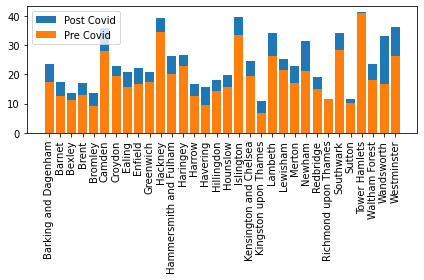

In [42]:
# Graph of the percentage of students eligble for fsm per area.
# An indication of the poorest areas
x_pre = df_pre_covid['Area']
y_pre = df_pre_covid['percentage of students eligible for fsm']
x_post = df_post_covid['Area']
y_post = df_post_covid['percentage of students eligible for fsm']
plt.bar(x_post, y_post, label = 'Post Covid')
plt.bar(x_pre, y_pre, label = 'Pre Covid')
plt.xticks(x_pre, rotation=90)
plt.tight_layout()
plt.legend()
plt.show()

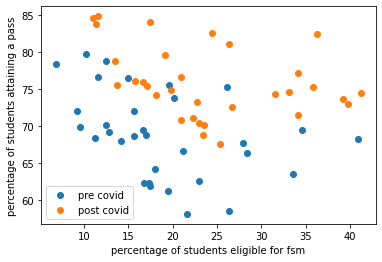

In [67]:
fsm_eligibility_pre = df_pre_covid['percentage of students eligible for fsm']
strong_pass_pre = df_pre_covid['Percentage of pupils who achieved a strong pass (9-5)']
standard_pass_pre = df_pre_covid['Percentage of pupils who achieved a standard pass (9-4)']

fsm_eligibility_post = df_post_covid['percentage of students eligible for fsm']
strong_pass_post = df_post_covid['Percentage of pupils who achieved a strong pass (9-5)']
standard_pass_post = df_post_covid['Percentage of pupils who achieved a standard pass (9-4)']

# plt.scatter(fsm_eligibility_pre, strong_pass_pre, label='pre covid')
plt.scatter(fsm_eligibility_pre, standard_pass_pre, label = 'pre covid')
# plt.scatter(fsm_eligibility_post, strong_pass_post, label='post covid')
plt.scatter(fsm_eligibility_post, standard_pass_post, label = 'post covid')

plt.xlabel('percentage of students eligible for fsm')
plt.ylabel('percentage of students attaining a pass')
plt.legend()
plt.show()

# as percentage of students eligible for fsm increases, strong pass results decresed.
# Is this a stronger negative correlation when online learning was introduced?

In [78]:
# Changing the data type of all integer values

df_pre_covid.iloc[:,2:17] = df_pre_covid.iloc[:,2:17].astype('int')
# df_pre_covid.dtypes

df_post_covid.iloc[:,2:17] = df_post_covid.iloc[:,2:17].astype('int')
# df_post_covid.dtypes

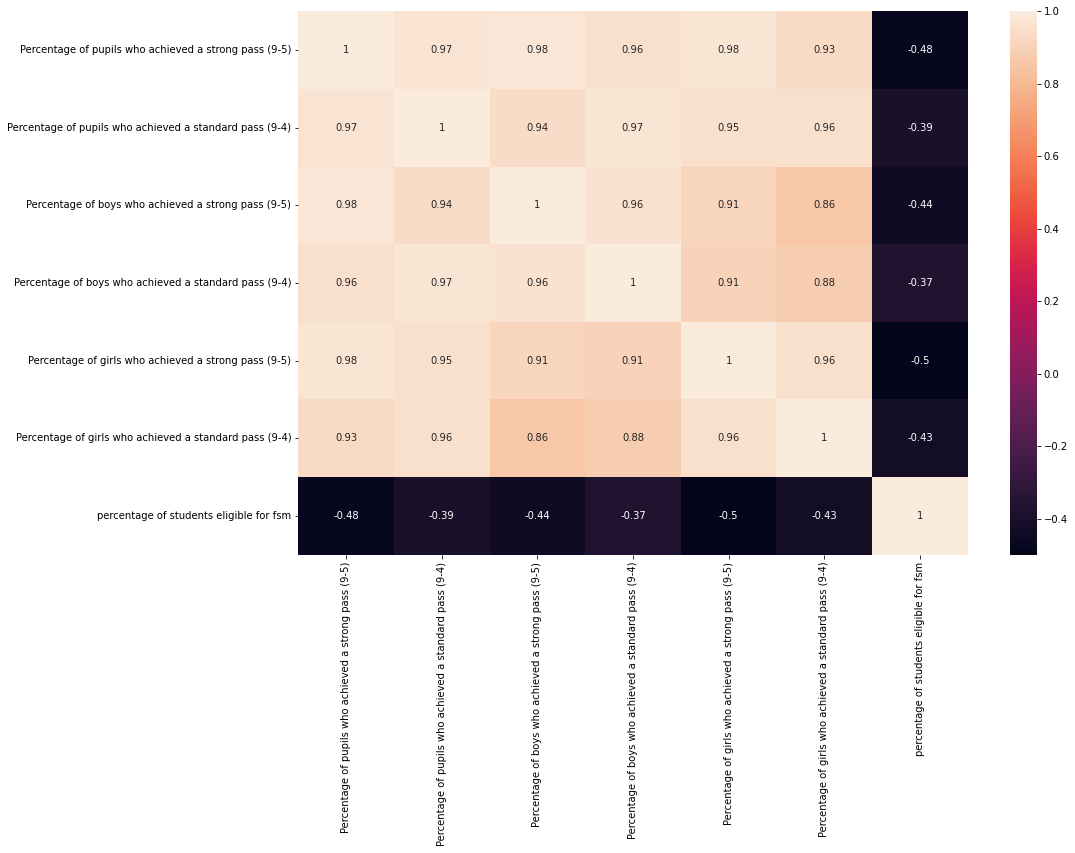

In [79]:
# import seaborn as sns

compare_columns = df_pre_covid.iloc[:, [5,6,8,9,11,12,16]]
compare_columns


plt.figure(figsize = (15,10))
correlation_matrix = compare_columns.corr()
# df.corr does the coefficient of every column against every column

# seaborn adds heatmap to visually highlight significant values in the matrix
sns.heatmap(data = correlation_matrix, annot = True)

plt.show()

<Figure size 1296x1296 with 0 Axes>

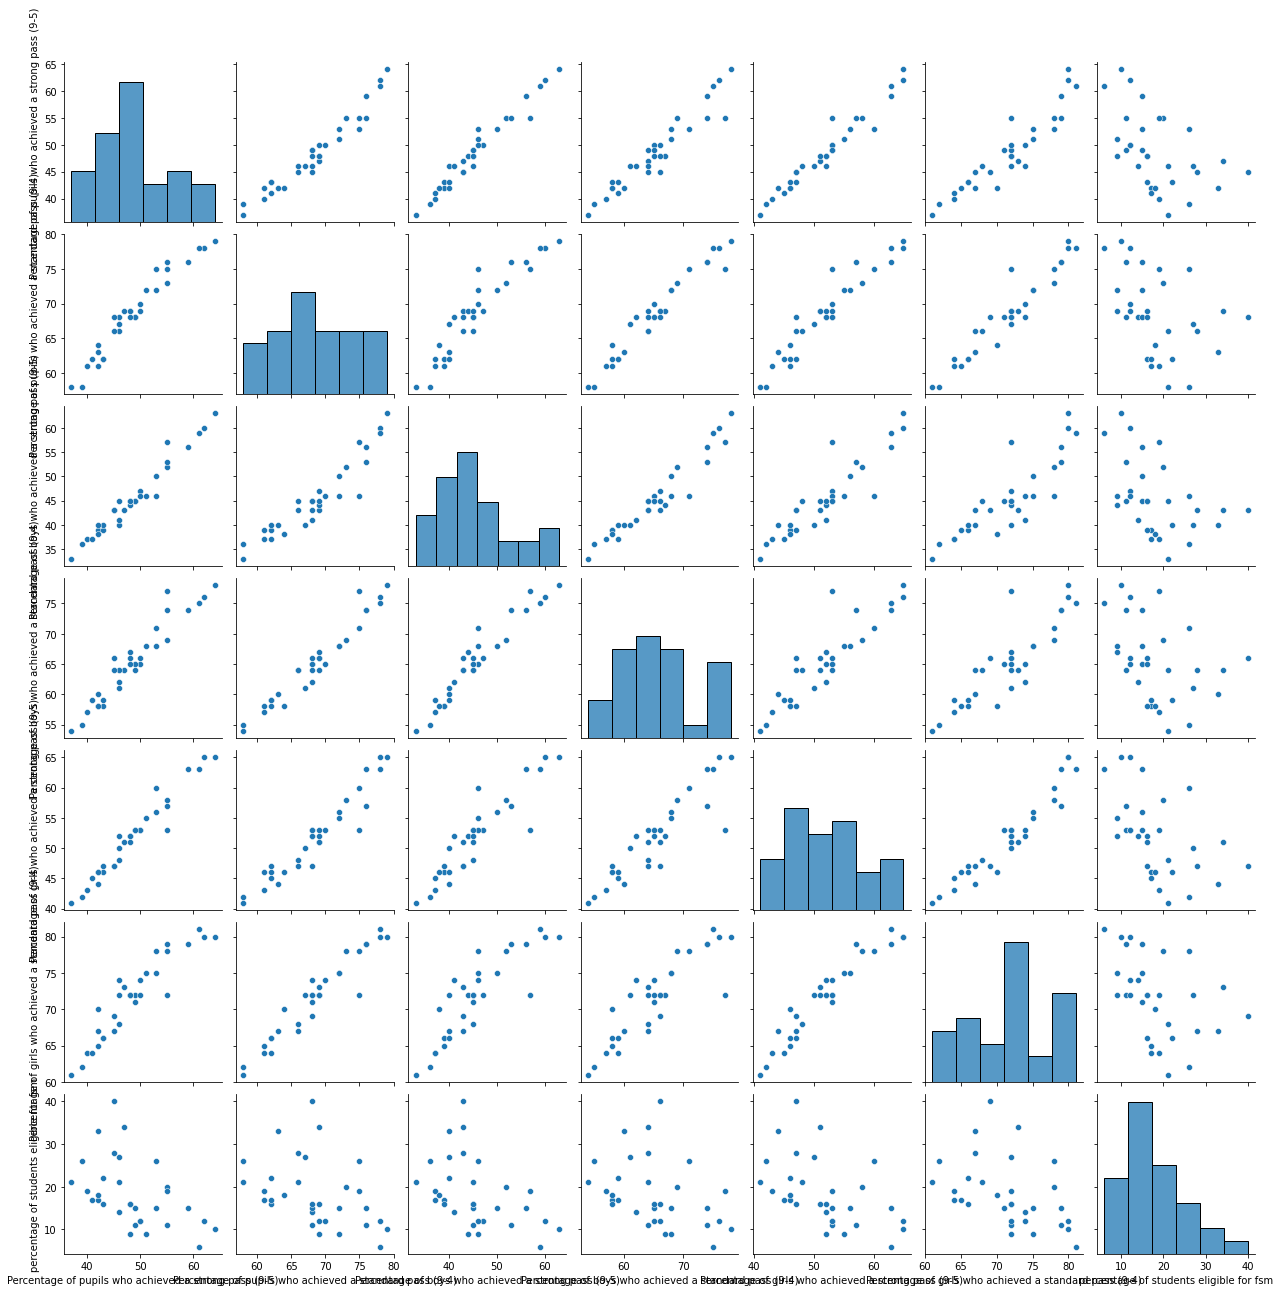

In [82]:
plt.figure(figsize=(18,18))
sns.pairplot(compare_columns)

In [91]:
df_pre_covid.columns

Index(['Code ID', 'Area', 'Number of Pupils at the end of KS4',
       'Average Attainment 8 score per pupil',
       'Percentage of pupils entered for components',
       'Percentage of pupils who achieved a strong pass (9-5)',
       'Percentage of pupils who achieved a standard pass (9-4)',
       'Number of boys at the end of KS4',
       'Percentage of boys who achieved a strong pass (9-5)',
       'Percentage of boys who achieved a standard pass (9-4)',
       'Number of girls at the end of KS4',
       'Percentage of girls who achieved a strong pass (9-5)',
       'Percentage of girls who achieved a standard pass (9-4)',
       'Number of pupils known to be eligible for free school meals',
       'Number of other pupils', 'Total pupils',
       'percentage of students eligible for fsm'],
      dtype='object')

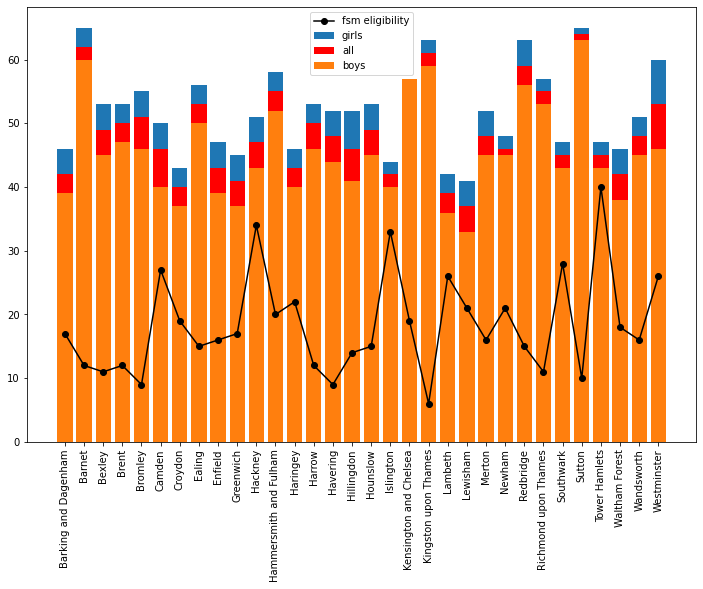

In [105]:
# pre covid
x = df_pre_covid['Area']
y_boys=df_pre_covid['Percentage of boys who achieved a strong pass (9-5)']
y_girls=df_pre_covid['Percentage of girls who achieved a strong pass (9-5)']
y_all=df_pre_covid['Percentage of pupils who achieved a strong pass (9-5)']

# x = df_pre_covid['Area']
# y_boys=df_pre_covid['Percentage of boys who achieved a standard pass (9-4)']
# y_girls=df_pre_covid['Percentage of girls who achieved a standard pass (9-4)']
# y_all=df_pre_covid['Percentage of pupils who achieved a standard pass (9-4)']
# y_fsm=df_pre_covid['percentage of students eligible for fsm']


plt.figure(figsize=(12,8))
plt.bar(x, y_girls, label='girls')
plt.bar(x, y_all, label='all', color='r')
plt.bar(x, y_boys, label='boys')
plt.plot(x, y_fsm, label='fsm eligibility', color='k', marker='o')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
# extract the cleaned and merged data frames into CSV files
df_post_covid.to_csv('postcovidmerged.csv',index=None, header=True)
df_pre_covid.to_csv('precovidmerged.csv',index=None, header=True)